In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

## `cv2.bitwise_add()`: Official Website's Example
OpenCV logo on top of Messi: <https://docs.opencv.org/4.6.0/d0/d86/tutorial_py_image_arithmetics.html>

Basically, the syntax
```python
cv2.bitwise_add(arr1, arr2, mask=mask)
```
simply says
- I am going to do `bitwise and` operation to `arr1` and `arr2` (byte after byte)
- I will only do the addition there where `mask == 255`

In [2]:
!ls ../images/

corbeille  messi.jpg  opencv_logo.png


In [3]:
!identify ../images/{messi.jpg,opencv_logo.png} | awk '{print $1, $3}'

../images/messi.jpg 548x342
../images/opencv_logo.png 1200x1478


In [4]:
messi_path = "../images/messi.jpg"
orig_logo_path = "../images/opencv_logo.png"
messi = cv2.imread(messi_path)
h_messi, w_messi, _ = messi.shape

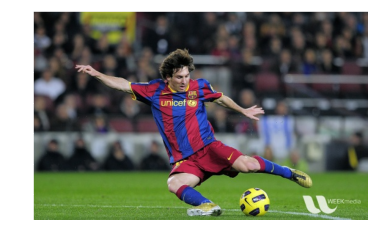

In [5]:
plt.imshow(messi[...,::-1]);

In [6]:
logo_path = "./resize_logo.jpg"
!convert {orig_logo_path} \
    -resize {h_messi}x{h_messi} {logo_path}

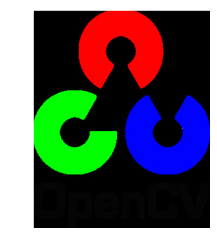

In [7]:
logo = cv2.imread(logo_path)
plt.imshow(logo[..., ::-1]);

In [8]:
h_logo, w_logo, _ = logo.shape
print(f"{w_messi = }")
print(f"{h_messi = }")
print(f"{w_logo = }")
print(f"{h_logo = }")

w_messi = 548
h_messi = 342
w_logo = 278
h_logo = 342


Good, the heights of the two read images are identical now.

In [9]:
messi.shape > logo.shape

True

## Masks

In [10]:
cv2.threshold?

Docstring:
threshold(src, thresh, maxval, type[, dst]) -> retval, dst
.   @brief Applies a fixed-level threshold to each array element.
.   
.   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
.   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
.   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
.   values. There are several types of thresholding supported by the function. They are determined by
.   type parameter.
.   
.   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
.   above values. In these cases, the function determines the optimal threshold value using the Otsu's
.   or Triangle algorithm and uses it instead of the specified thresh.
.   
.   @note Currently, the Otsu's and Triangle methods are implemented only for 8-bit single-channel images.
.   
.   @param src input array (multiple-cha

In [11]:
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
logo_gray.shape

(342, 278)

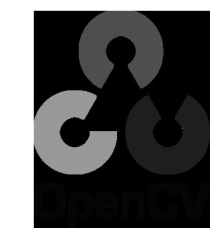

In [12]:
plt.imshow(logo_gray, cmap="gray");

In [13]:
ret, mask = cv2.threshold(
    logo_gray, 10, 255, cv2.THRESH_BINARY)
print(f"{ret = }")
print(f"{mask = }")

ret = 10.0
mask = array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)


In [14]:
mask_inv = cv2.bitwise_not(mask)
mask_inv

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

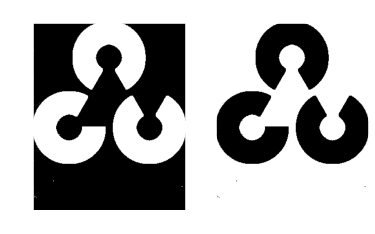

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(mask, cmap="gray")
ax1.set_title("mask")
ax2.imshow(mask_inv, cmap="gray")
ax2.set_title("mask_inv");

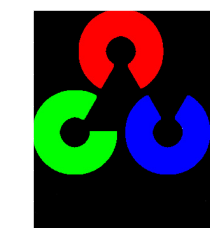

In [16]:
fg = cv2.bitwise_and(logo, logo, mask=mask)
plt.imshow(fg[..., ::-1]);

Even though visually `fg` looks like `logo`, they are different arrays. Indeed,

In [17]:
np.array_equal(fg, logo)

False

In [18]:
np.sum(fg-logo)

11186123

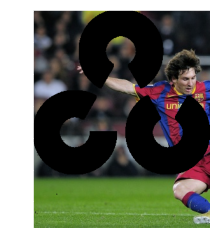

In [19]:
roi = messi[:h_logo, :w_logo]
bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
plt.imshow(bg[..., ::-1]);

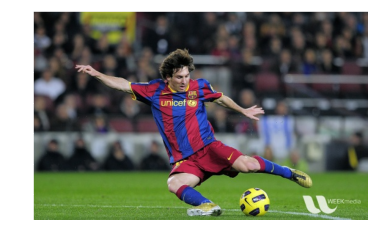

In [20]:
# cv2.bitwise_and() creates a copy, not inplace
plt.imshow(messi[..., ::-1]);

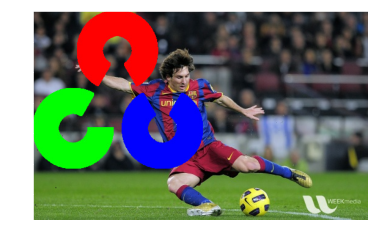

In [21]:
watermarked = messi.copy()
watermarked[:h_logo, :w_logo] = cv2.add(fg, bg)
plt.imshow(watermarked[..., ::-1]);

**(?)** Could we achieve the same watermark effect using `cv2.bitwise_or()` with masks?  
**(R)** Yes. It does not matter here to use `cv2.bitwise_and()` or `cv2.bitwise_or()`. In fact, we can simply replace the `bitwsie_and()` above by `bitwise_or()`, and it'll just work!

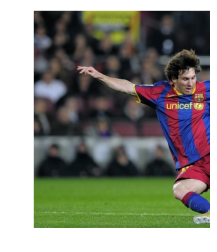

In [22]:
plt.imshow(roi[...,::-1]);

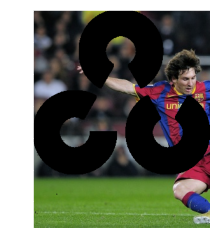

In [23]:
bg = cv2.bitwise_or(roi, roi, mask=mask_inv)
plt.imshow(bg[..., ::-1]);

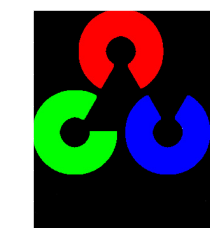

In [24]:
fg = cv2.bitwise_or(logo, logo, mask=mask)
plt.imshow(fg[..., ::-1]);

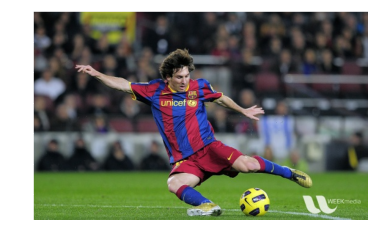

In [25]:
watermarked = messi.copy()
plt.imshow(watermarked[..., ::-1]);

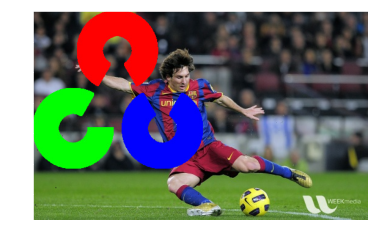

In [26]:
watermarked[:h_logo, :w_logo] = cv2.add(fg, bg)
plt.imshow(watermarked[..., ::-1]);

## The Usage of These `bitwise` functions

In [27]:
cv2.bitwise_not(1)

array([[-4.],
       [nan],
       [nan],
       [nan]])

In [28]:
cv2.bitwise_not(2)

array([[-2.],
       [nan],
       [nan],
       [nan]])

In [29]:
cv2.bitwise_not(3)

array([[-1.5],
       [ nan],
       [ nan],
       [ nan]])

In [30]:
cv2.bitwise_not(np.array([1,2,3]))

array([[-2],
       [-3],
       [-4]], dtype=int32)

In [31]:
np.array([1,2,3]).dtype

dtype('int64')

In [32]:
import sys

In [33]:
sys.getsizeof(1)

28

In [34]:
for i in range(10):
    print(f"{sys.getsizeof(i) = }")

sys.getsizeof(i) = 24
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28
sys.getsizeof(i) = 28


<https://stackoverflow.com/questions/10365624/sys-getsizeofint-returns-an-unreasonably-large-value>

In [35]:
a = cv2.bitwise_not(1)
a.shape, a.dtype

((4, 1), dtype('float64'))

In [36]:
a = cv2.bitwise_not(0)
a.shape, a.dtype

((4, 1), dtype('float64'))

**(?)** So maybe `cv2.bitwise_not` only accept to deal with (arrays of) boolean values?

In [37]:
cv2.bitwise_not(True)

array([[-4.],
       [nan],
       [nan],
       [nan]])

In [38]:
cv2.bitwise_not(False)

array([[nan],
       [nan],
       [nan],
       [nan]])

In [39]:
True == 1

True

In [40]:
False == 0

True

In [41]:
np.array([0, 1], dtype=bool)

array([False,  True])

In [42]:
import traceback

In [43]:
try:
    cv2.bitwise_not(np.array([0, 1], dtype=bool))
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "/tmp/ipykernel_3333/1390168959.py", line 2, in <cell line: 1>
    cv2.bitwise_not(np.array([0, 1], dtype=bool))
cv2.error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'bitwise_not'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'



In [44]:
np.array([False, True])

array([False,  True])

In [45]:
try:
    cv2.bitwise_not(np.array([False, True]))
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "/tmp/ipykernel_3333/642480570.py", line 2, in <cell line: 1>
    cv2.bitwise_not(np.array([False, True]))
cv2.error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'bitwise_not'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'



In [46]:
help(cv2.bitwise_not)

Help on built-in function bitwise_not:

bitwise_not(...)
    bitwise_not(src[, dst[, mask]]) -> dst
    .   @brief  Inverts every bit of an array.
    .   
    .   The function cv::bitwise_not calculates per-element bit-wise inversion of the input
    .   array:
    .   \f[\texttt{dst} (I) =  \neg \texttt{src} (I)\f]
    .   In case of a floating-point input array, its machine-specific bit
    .   representation (usually IEEE754-compliant) is used for the operation. In
    .   case of multi-channel arrays, each channel is processed independently.
    .   @param src input array.
    .   @param dst output array that has the same size and type as the input
    .   array.
    .   @param mask optional operation mask, 8-bit single channel array, that
    .   specifies elements of the output array to be changed.



In [47]:
cv2.bitwise_not(np.arange(5, dtype=np.int8))

array([[-1],
       [-2],
       [-3],
       [-4],
       [-5]], dtype=int8)

In [48]:
cv2.bitwise_not(np.arange(5, dtype=np.int32))

array([[-1],
       [-2],
       [-3],
       [-4],
       [-5]], dtype=int32)

In [49]:
cv2.bitwise_not(np.array([0,1], dtype=np.int8))

array([[-1],
       [-2]], dtype=int8)

In [50]:
cv2.bitwise_not(np.array([0,1], dtype=np.uint8))

array([[255],
       [254]], dtype=uint8)